# Questão 1

Letra (B): Este universo tem 15.73 Ganos em z=0
Letra (C): O tamanho físico que podemos resolver com este telescópio é 0.01622 kpc em z=16
Letra (D): Este universo tem 0.28 Ganos em z=16
Letra (E): A distância horizonte é 1.53 Gpc


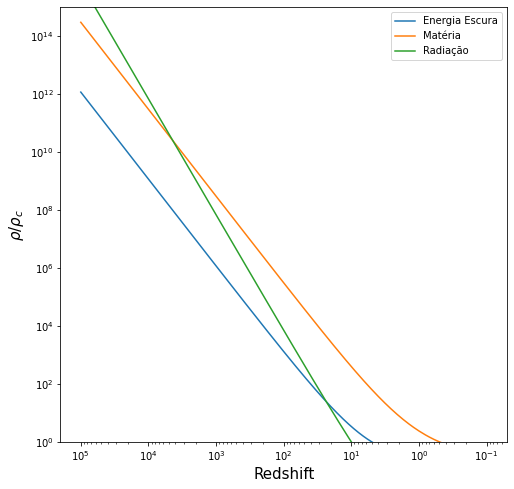

In [87]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

T=2.725
H_0=60/3.086e19 #em segundos
omega_rad=(32*sc.pi*sc.G*sc.sigma*(T**4))/(3*((H_0)**2)*(sc.c**3))
omega_m=0.3
omega_l=0.6
omega_k=1-omega_rad-omega_l-omega_m

# Letra b:
def idade_universo_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/((1+z)*Ez)

idade=(1/H_0)*(quad(idade_universo_int, 0, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (B): Este universo tem {idade_ganos:.2f} Ganos em z=0")

# Letra c:

def distancia_comovel_int(z):
    materia=omega_m*((1+z)**3)
    radiacao=omega_rad*((1+z)**4)
    energia_escura=(omega_l/512)*(((2+z)**9)/((1+z)**6))
    curvatura=omega_k*((1+z)**2)
    Ez=np.sqrt(materia+radiacao+energia_escura+curvatura)
    return 1/Ez

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, 0, 16)[0] #em metros
diametro_angular=distancia_comovel/(1+16) #em metros, onde z=16
resol_telesco=0.05*(sc.pi/(180*3600)) #em radianos
# Como resol_telesco << 1 radiano, podemos usar R=alpha*d_A, logo:
tam_fisico=resol_telesco*diametro_angular/3.24e20 #em kiloparsec
print(f"Letra (C): O tamanho físico que podemos resolver com este telescópio é {tam_fisico:.5f} kpc em z=16")

# Letra d:

idade=(1/H_0)*(quad(idade_universo_int, 16, np.inf))[0] #em segundos
idade_ganos=idade/(3600*24*365*1e9) # em giganos
print(f"Letra (D): Este universo tem {idade_ganos:.2f} Ganos em z=16")

# Letra e:

distancia_comovel=(sc.c/H_0)*quad(distancia_comovel_int, 0, np.inf)[0] #em metros
distancia_horizonte=distancia_comovel/3.24e26
print(f"Letra (E): A distância horizonte é {distancia_horizonte:.2f} Gpc")

# Letra f:

z=np.arange(-1e1, 1e5, 0.1)
def pho_de (z): return (omega_l/512)*(((2+z)**9)/((1+z)**6))
def pho_m (z): return omega_m*((1+z)**3)
def pho_rad (z): return omega_rad*((1+z)**4)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.plot(z, pho_de(z), label='Energia Escura')
ax.plot(z, pho_m(z), label='Matéria')
ax.plot(z, pho_rad(z), label='Radiação')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1, 1e15])
ax.invert_xaxis()
ax.set_xlabel(r'Redshift', size=15)
ax.set_ylabel(r'$\rho$/$\rho_c$', size=15)
plt.legend()
plt.savefig('densidades.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')

